CSCI218 Assignment 1 Task 3: CNN Classifier
======================================================================================
Name: Beatrice Romero Mailum    ||  UOW ID: 8550724     ||      Module: CSCI218
======================================================================================

IMPORTING LIBRARIES

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
X, y = make_classification(n_samples=100, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tqdm import tqdm
from timeit import default_timer as timer

LOADING DATASET

In [2]:

def load_dataset(base_path="C:\\Users\\belei\\Desktop\\SIM\\Big Data\\YEAR 2\\Y2 SEM 3\\218\\LAB\\flowers", img_size = 150):
    LABELS = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
    X = []
    Y = []
    
    for label in LABELS:
        folder_path = os.path.join(base_path, label)
        print(f"Checking folder: '{folder_path}'")  # Debugging
        print(f"Exists? {os.path.exists(folder_path)}")  # Debugging

        # Skip missing folders
        if not os.path.exists(folder_path): 
            continue

        for img_name in tqdm(os.listdir(folder_path)):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path) #loading the image
            img = cv2.resize(img, (img_size, img_size))
            X.append(img)
            Y.append(label)

    # Convert lists to NumPy arrays
    X = np.array(X)
    Y = np.array(Y)  # Convert labels to numbers
    
    return X, Y

PREPROCESSING IMGES, LOADING IN DATASET, EXTRACTING COLOR HISTOGRAM

In [3]:
def preprocess_image(X, Y):
    #normalize the pixel values
    X = X / 255.0
    encoder = LabelEncoder()
    #converts target values to numerics
    Y = encoder.fit_transform(Y)
    return X, Y

In [4]:
X, Y = load_dataset()
print(f"X shape: {X.shape}")  # Expected: (num_samples, num_features)
print(f"y shape: {Y.shape}")  # Expected: (num_samples,)'Loaded {len(X) - current_size} {LABELS[i]} images')

X, Y = preprocess_image(X, Y)
print(f"Shape of X: {X.shape}")
print(f"Shape of Y: {Y.shape}")

Checking folder: 'C:\Users\belei\Desktop\SIM\Big Data\YEAR 2\Y2 SEM 3\218\LAB\flowers\daisy'
Exists? True


100%|██████████| 764/764 [00:03<00:00, 222.82it/s]


Checking folder: 'C:\Users\belei\Desktop\SIM\Big Data\YEAR 2\Y2 SEM 3\218\LAB\flowers\dandelion'
Exists? True


100%|██████████| 1052/1052 [00:03<00:00, 264.53it/s]


Checking folder: 'C:\Users\belei\Desktop\SIM\Big Data\YEAR 2\Y2 SEM 3\218\LAB\flowers\rose'
Exists? True


100%|██████████| 784/784 [00:02<00:00, 273.22it/s]


Checking folder: 'C:\Users\belei\Desktop\SIM\Big Data\YEAR 2\Y2 SEM 3\218\LAB\flowers\sunflower'
Exists? True


100%|██████████| 733/733 [00:03<00:00, 242.29it/s]


Checking folder: 'C:\Users\belei\Desktop\SIM\Big Data\YEAR 2\Y2 SEM 3\218\LAB\flowers\tulip'
Exists? True


100%|██████████| 984/984 [00:03<00:00, 247.71it/s]


X shape: (4317, 150, 150, 3)
y shape: (4317,)
Shape of X: (4317, 150, 150, 3)
Shape of Y: (4317,)


SPLITTING INTO TRAINING, VALIDATON AND TESTING

In [5]:
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")


Training set: (2590, 150, 150, 3), (2590,)
Validation set: (863, 150, 150, 3), (863,)
Test set: (864, 150, 150, 3), (864,)


CNN MODEL IMPORTS

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import time


BUILDING CNN MODEL

In [7]:
def build_cnn(input_shape=(150, 150, 3), num_classes=5):
    model = Sequential([
        #layer 1
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),

        #layer 2
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        #layer 3
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        #flatten layers
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),  # Prevent overfitting
        Dense(num_classes, activation='softmax')  # Output layer (5 flower classes)
    ])
    
    # Compile model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model


TRAINING CNN MODEL

In [8]:
# Build the model
cnn_model = build_cnn()

# Define Early Stopping (Optional: Stops training if no improvement)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Start training timer
start_time = time.time()

# Train the model
history = cnn_model.fit(X_train, y_train, 
                        validation_data=(X_val, y_val), 
                        epochs=30, batch_size=32, 
                        callbacks=[early_stopping])

# End training timer
training_time = time.time() - start_time
print(f"\nTotal Training Time: {training_time:.4f} seconds")


C:\Users\belei\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - accuracy: 0.3083 - loss: 1.6142 - val_accuracy: 0.4959 - val_loss: 1.1953
Epoch 2/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - accuracy: 0.5282 - loss: 1.1585 - val_accuracy: 0.5886 - val_loss: 1.0345
Epoch 3/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - accuracy: 0.5910 - loss: 1.0274 - val_accuracy: 0.6292 - val_loss: 0.9501
Epoch 4/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - accuracy: 0.6204 - loss: 0.9421 - val_accuracy: 0.6605 - val_loss: 0.9168
Epoch 5/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.6737 - loss: 0.8235 - val_accuracy: 0.6466 - val_loss: 0.9893
Epoch 6/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - accuracy: 0.7303 - loss: 0.7216 - val_accuracy: 0.6709 - val_loss: 0.8949
Epoch 7/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - accuracy: 0.7942 - loss: 0.5630 - val_accuracy: 0.6535 - val_loss: 0.9875
Epoch 8/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - accuracy: 0.8119 - loss: 0.4843 - val_accuracy: 0.68

In [9]:
inference_start = time.time()

y_pred = cnn_model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1) 

inference_time = time.time() - inference_start
print(f"\nInference Time for One Run: {inference_time:.4f} seconds")


print("\nClassification Report:")
print(classification_report(y_test, y_pred_labels))


conf_matrix = confusion_matrix(y_test, y_pred_labels)
print("\nConfusion Matrix:")
print(conf_matrix)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step

Inference Time for One Run: 0.9883 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.57      0.63       167
           1       0.66      0.76      0.71       215
           2       0.67      0.56      0.61       162
           3       0.65      0.82      0.72       141
           4       0.70      0.66      0.68       179

    accuracy                           0.67       864
   macro avg       0.68      0.67      0.67       864
weighted avg       0.68      0.67      0.67       864


Confusion Matrix:
[[ 95  43  10   8  11]
 [ 17 164   3  27   4]
 [ 16  15  90   9  32]
 [  2  15   5 115   4]
 [  5  10  27  18 119]]


TRAINING LOSS AND VALIDATION LOSS TO THE NO. OF EPOCHS

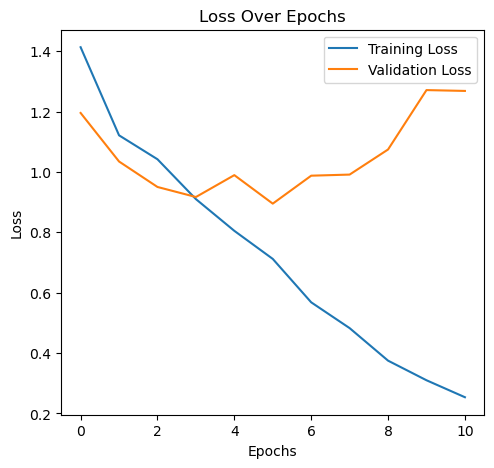

In [10]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


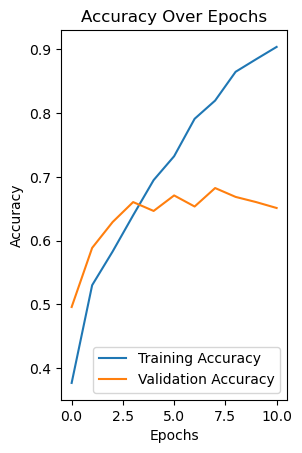

In [11]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


DISPLAY 5 CORRECTLY/INCORRECTLY CLASSIFIED IMAGES


Correctly Classified: 583 images
Wrongly Classified: 281 images


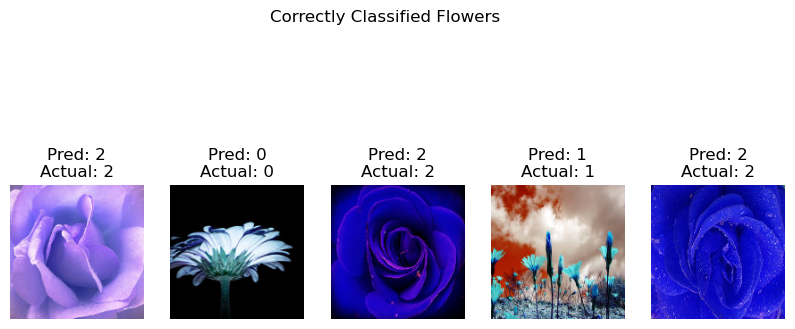

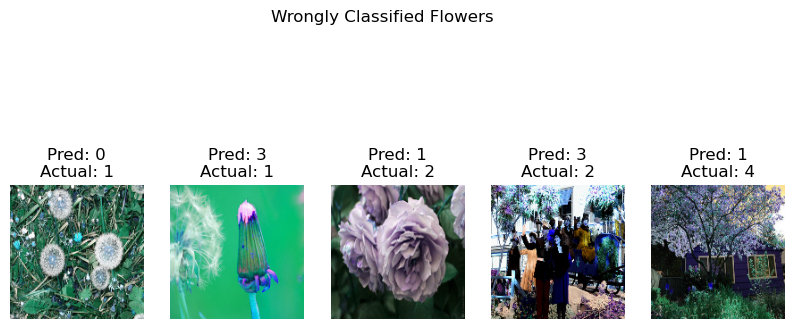

In [12]:
correct_indices = np.where(y_pred_labels == y_test)[0]
wrong_indices = np.where(y_pred_labels != y_test)[0]

print(f"\nCorrectly Classified: {len(correct_indices)} images")
print(f"Wrongly Classified: {len(wrong_indices)} images")

def show_images(indices, title, num_images=5):
    plt.figure(figsize=(10, 5))

    for i, idx in enumerate(indices[:num_images]):
        img = X_test[idx]

        if img.shape[-1] != 3:
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)  # Ensure RGB
        plt.subplot(1, num_images, i+1)
        plt.imshow((img * 255).astype("uint8"))
        plt.axis("off")
        plt.title(f"Pred: {y_pred_labels[idx]}\nActual: {y_test[idx]}")
        
    plt.suptitle(title)
    plt.show()

show_images(correct_indices, "Correctly Classified Flowers")
show_images(wrong_indices, "Wrongly Classified Flowers ")
